# Naive Bayes

[Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder 

In [3]:
df = pd.read_csv('/healthcare-dataset-stroke-data.csv')

In [5]:
df.shape

(5110, 12)

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
# Feature Engineering

label_gender = LabelEncoder()
df['gender'] = label_gender.fit_transform(df['gender'])

label_ever_married = LabelEncoder()
df['ever_married'] = label_ever_married.fit_transform(df['ever_married'])

label_work_type = LabelEncoder()
df['work_type'] = label_ever_married.fit_transform(df['work_type'])

label_residence_type = LabelEncoder()
df['Residence_type'] = label_residence_type.fit_transform(df['Residence_type'])

label_smoking_status = LabelEncoder()
df['smoking_status'] = label_smoking_status.fit_transform(df['smoking_status'])

df.bmi.fillna(round(df.bmi.mean(),2), inplace = True)

In [35]:
# defining the predictive and target variables
x = df.drop('stroke', axis = 1).values
y = df['stroke'].values

In [36]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2)

In [61]:
# training the model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [62]:
# performance in the train
round(accuracy_score(y_train, naive_bayes.predict(x_train))*100,2)

91.95

In [63]:
# performance in the test
round(accuracy_score(y_test, naive_bayes.predict(x_test))*100,2)

91.59

In [44]:
matrix_conf = confusion_matrix(y_test, naive_bayes.predict(x_test))

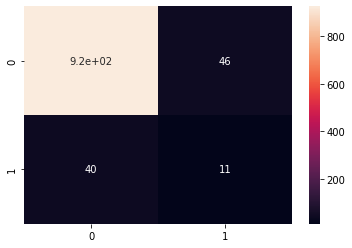

In [48]:
sns.heatmap(matrix_conf, annot = True)

In [51]:
# the score to class 1 is not good. 
print(classification_report(y_test, naive_bayes.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       971
           1       0.19      0.22      0.20        51

    accuracy                           0.92      1022
   macro avg       0.58      0.58      0.58      1022
weighted avg       0.92      0.92      0.92      1022



In [67]:
# appling the oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
x_over, y_over = smote.fit_resample(x_train,y_train)

new_naive_bayes = GaussianNB()
new_naive_bayes.fit(x_over, y_over)

GaussianNB()

In [68]:
# performance in the train with oversampling
round(accuracy_score(y_over, new_naive_bayes.predict(x_over))*100,2)

78.33

In [69]:
# performance in the test with oversampling
round(accuracy_score(y_test, new_naive_bayes.predict(x_test))*100,2)

67.61

In [70]:
# the model performed better without oversampling
print(classification_report(y_test, new_naive_bayes.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.66      0.80       971
           1       0.12      0.90      0.22        51

    accuracy                           0.68      1022
   macro avg       0.56      0.78      0.51      1022
weighted avg       0.95      0.68      0.77      1022

